# Installation of Datasets

This tutorial will show how to install a dataset. The `dpmhm` package does not provide actual datasets, only the facilities of preprocessing. Datasets must be installed before they can be loaded into memory and used with ML models. 

Installation consists of first downloading the original data then building the dataset of [tfrecord](https://www.tensorflow.org/tutorials/load_data/tfrecord) format using [`tensorflow-datasets`](https://www.tensorflow.org/datasets/overview). The procedure can be manual or fully automatic and eventually time-consuming depending on the specific dataset. However it needs to be run only once.

In this tutorial we will be installing the CWRU bearing dataset, a widely adopted reference in the community of MHM. The same procedure applies also for other datasets. Specific instructions of installation can be found in the document page of each dataset.

In [1]:
# # Disable tf's logging
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
from matplotlib import pyplot as plt

from pathlib import Path

from IPython.display import Audio

import logging
logging.basicConfig()
logging.getLogger('dpmhm').setLevel(10)

import dpmhm
# dpmhm.datasets.get_dataset_list()

2023-04-18 10:11:58.638817: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:11:58.676891: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:11:58.677617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 10:11:59.447751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Installing the dataset CWRU
Installing a dataset consists in 2 steps:
1. downloading the original files from appropriate sources
2. building the dataset of tfrecord format.

Note: The building step involves parsing and converting the original dataset. In `dpmhm` we followed the principle that all information from the original dataset should be preserved if possible in the built dataset. In particular, each original data file is mapped to an item in the built dataset.
    
The procedure can be fully automatic or manual. 

Define first the location for the tensorflow datasets (including temporary files of download & extraction). On Unix-like systems, the default location is `~/tensorflow_datasets`. This can be changed by setting the environment variable `TFDS_DATA_DIR` or passing the argument in the python methods `tfds.builder()` or `tfds.load()` or via the CLI `tfds build`.

In [2]:
TFDS_DATA_DIR = os.path.expanduser('~/tensorflow_datasets/')

### Method 1: Automatic installation
We use the method [`dpmhm.datasets.install()`] to automatically download and prepare the dataset. This method is a thin wrapper of `tfds.load()`. 

In [3]:
_ = dpmhm.datasets.install('CWRU', 
                           data_dir=TFDS_DATA_DIR,
#                            download_dir=,
#                            extract_dir=,
                          )

DEBUG:dpmhm.datasets:Downloading data files...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

DEBUG:dpmhm.datasets:Building the dataset...
2023-04-18 10:12:01.234745: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/han/tensorflow_datasets/cwru/1.0.0.incompleteMJU65M/cwru-train.tfrecord*...:   0%|          | …

Dataset cwru downloaded and prepared to /home/han/tensorflow_datasets/cwru/1.0.0. Subsequent calls will reuse this data.


2023-04-18 10:12:21.712539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-18 10:12:21.736155: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


This will install the dataset `cwru` in the place specified by `data_dir`. If `data_dir` is not set the value of the environment variable `TFDS_DATA_DIR` will be used (default to `~/tensorflow_datasets`).

`dpmhm.datasets.install()` will by default save the download into the subfolder `TFDS_DATA_DIR/dpmhm/downloads` and extract the data files into `TFDS_DATA_DIR/dpmhm/extracted`. These folders can be modified by specifying the keyword arguments.

### Method 2: Manual installation
In case that automatic installation cannot be completed, due to e.g. difficulties in downloading the orginal data files, we resort to manual installation by separating the steps of download and build.

First retrieve the urls of data files of a dataset:

In [4]:
URLS = dpmhm.datasets.get_urls('cwru')
print(URLS)

['https://sandbox.zenodo.org/record/1183527/files/cwru.zip']


Then download and extract manually all data files, for example via the terminal commands
```sh
$ cd ~/tmp
$ curl https://sandbox.zenodo.org/record/1183527/files/cwru.zip -o cwru.zip
$ unzip cwru.zip  # extract all files into the folder `~/tmp/cwru`.
```

Then pass the argument `manual_dir` in `dpmhm.datasets.install()` to build the dataset:

In [5]:
_ = dpmhm.datasets.install('CWRU', 
                            data_dir=TFDS_DATA_DIR,                           
                            manual_dir=os.path.expanduser('~/tmp/cwru')
                          )

DEBUG:dpmhm.datasets:Building the dataset...


Or equivalently build the dataset with the command [`tfds build`](https://www.tensorflow.org/datasets/cli)
```sh
$ tfds build CWRU --imports dpmhm.datasets.cwru --manual_dir ~/tmp/cwru --data_dir ~/tensorflow_datasets
```
which will read the data files in `~/tmp/cwru` and build the dataset into `~/tensorflow_datasets`. 

### Remove an installed dataset

To remove the installed dataset, simply delete the folder `cwru` contained in the folder `TFDS_DATA_DIR`. To reinstall the dataset, repeat the procedure above and the data files already downloaded & extracted will be automatically reused.

## Load & Visualization

After installation, the dataset is stored locally and can be loaded into memory using `tfds.load()`.

In [6]:
dataset_name = 'CWRU'

ds_all, ds_info = tfds.load(
    dataset_name, 
    data_dir=TFDS_DATA_DIR,
    # split=['train[:75%]', 'train[75%:]'],   
    # split=['all'],
    with_info=True,
    # batch_size=-1,  # load the whole dataset into a single batch
)

print(ds_all.keys())  # show the split of the raw dataset

ds0 = ds_all['train']

dict_keys(['train'])


In general the variable `ds_all` may contain multiple fields of split, and `ds_info` contains information about the dataset.
Here the only split of CWRU is 'train'. The built dataset has 161 records which is also the number of files in the original dataset.

In [7]:
ds0.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=161>

Let's take one element from the dataset and show its content:

In [8]:
eles = list(ds0.take(10).as_numpy_iterator())

eles[0]

2023-04-18 10:12:22.082785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4]
	 [[{{node Placeholder/_0}}]]
2023-04-18 10:12:22.083358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [4]
	 [[{{node Placeholder/_3}}]]


{'metadata': {'Dataset': b'CWRU',
  'FaultComponent': b'InnerRace',
  'FaultLocation': b'DriveEnd',
  'FaultSize': 0.014,
  'FileName': b'175.mat',
  'LoadForce': 1,
  'NominalRPM': 1772,
  'RPM': 1772},
 'sampling_rate': 48000,
 'signal': {'BA': array([], dtype=float32),
  'DE': array([-0.010016  , -0.00292133,  0.00542533, ...,  0.36141068,
          0.36141068,  0.34513468], dtype=float32),
  'FE': array([-0.07026546, -0.02958545,  0.04006363, ..., -0.05485636,
         -0.03020182, -0.01088909], dtype=float32)}}

Plot and play the wavform of different records / channels:

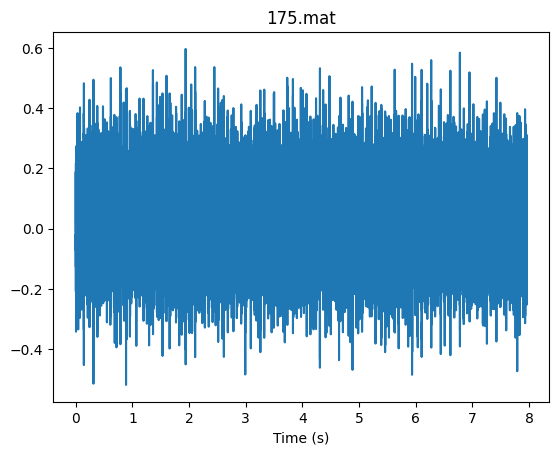

In [9]:
fn = eles[0]['metadata']['FileName'].decode()
sr = eles[0]['sampling_rate']
x = eles[0]['signal']['FE']

plt.figure()
plt.plot(np.arange(len(x))/sr, x)
plt.xlabel('Time (s)')
plt.title(fn)

Audio(x, rate=sr)

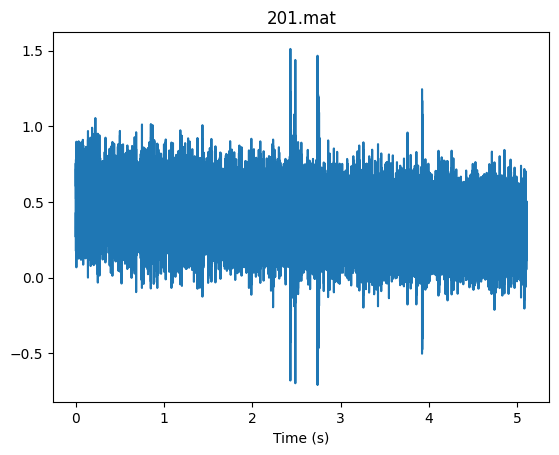

In [10]:
fn = eles[1]['metadata']['FileName'].decode()
sr = eles[1]['sampling_rate']
x = eles[1]['signal']['DE']

plt.figure()
plt.plot(np.arange(len(x))/sr, x)
plt.xlabel('Time (s)')
plt.title(fn)

Audio(x, rate=sr)

The element specification of a dataset is given by the property `.element_spec`. CWRU contains 3 channels ['BA', 'DE', 'FE'] and a common sampling rate. The variable `ds_info` contains the meaning of each field.

In [11]:
ds0.element_spec

{'metadata': {'Dataset': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FaultComponent': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FaultLocation': TensorSpec(shape=(), dtype=tf.string, name=None),
  'FaultSize': TensorSpec(shape=(), dtype=tf.float32, name=None),
  'FileName': TensorSpec(shape=(), dtype=tf.string, name=None),
  'LoadForce': TensorSpec(shape=(), dtype=tf.uint32, name=None),
  'NominalRPM': TensorSpec(shape=(), dtype=tf.uint32, name=None),
  'RPM': TensorSpec(shape=(), dtype=tf.uint32, name=None)},
 'sampling_rate': TensorSpec(shape=(), dtype=tf.uint32, name=None),
 'signal': {'BA': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'DE': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
  'FE': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}}